Imports

In [1]:
import sklearn
import numpy as np  #numeric operations
import pandas as pd  #work with tables,datasets etc.
import matplotlib.pyplot as plt  #plots
import tensorflow as tf #load dataset
import seaborn as sns #confusion matrix visualization
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import svm
from sklearn import preprocessing  #scaling
from sklearn.model_selection import GridSearchCV #gridsearch
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.svm import LinearSVC

Loading the dataset

In [2]:
(x_train, y_train), (x_test, y_test)= tf.keras.datasets.cifar10.load_data()

Κάνουμε tuple τις διαστάσεις

In [3]:
x_train = np.reshape(x_train, (x_train.shape[0], -1))
x_test =np.reshape(x_test, (x_test.shape[0], -1))
print(x_train.shape)

(50000, 3072)


Μειώνουμε το δείγμα στις 5000 παρατηρήσεις

In [4]:
x_train = x_train[0:5000:1]
print(x_train.shape)
y_train = y_train[0:5000:1]
print(y_train.shape)

(5000, 3072)
(5000, 1)


Normalizing

In [5]:
x_train = x_train /255.0
x_test = x_test /255.0

Κάνουμε το δείγμα μας να ακολουθεί κανονική κατανομή

In [24]:
scaled_data = preprocessing.scale(x_train.T)

In [20]:
print(np.mean(scaled_data),np.std(scaled_data)) #επιβεβαιωση ότι mean = 0 και standard deviation = 1

-3.256654205567126e-19


Εφαρμόζουμε PCA κρατώντας το 95% του variance

In [6]:
pca = PCA(n_components = 0.95)

In [7]:
pca.fit(x_train)

PCA(n_components=0.95)

In [11]:
print(len(pca.explained_variance_ratio_),sum(pca.explained_variance_ratio_)) #επιβεβαιώνουμε τα αποτελέσματα

203


Μετατρέπουμε τα δεδομένα μας σύμφωνα με το PCA

In [28]:
pca_data = pca.transform(x_train)
pca_data_test = pca.transform(x_test)

In [10]:
print(pca_data.shape) #επιβαιωση

(5000, 203)


Ploting first 10 principal components

In [16]:
per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
per_var=per_var[0:10]
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]

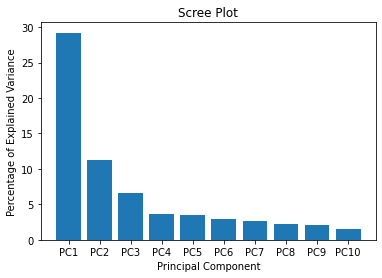

In [22]:
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

Grayscale

In [ ]:
x_train = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in x_train])
x_test = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in x_test])
print(x_train.shape)

Basic SVM model

In [ ]:
clf = svm.SVC(decision_function_shape='ovr', kernel = 'rbf', C=1, gamma= 'scale', cache_size= 2000,  probability= True, verbose = True)

In [ ]:
result = clf.fit(x_train,y_train)

In [ ]:
predictions = clf.score(x_test, y_test)
print(predictions)

Grid Search Model

In [25]:
# defining parameter range
param_grid = {'C': [100, 1000, 0.01],
              'gamma': [0.001,0.0001],
              'kernel': ['rbf'],
              'cache_size': [2000]}
 
grid = GridSearchCV(SVC(), param_grid, n_jobs= -1, refit = True, return_train_score = True, verbose = 3)
 
# fitting the model for grid search
grid.fit(pca_data, y_train)

#saving results to excel in a dataframe format
df = pd.DataFrame(grid.cv_results_)
df.to_excel('testResults4.xlsx')

Fitting 5 folds for each of 6 candidates, totalling 30 fits


z:\Docs old\Πανεπιστήμιο\Νευρωνικα δικτυα\Project 2\.SVM_vEnv\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [29]:
grid_predictions = grid.predict(pca_data_test)

In [ ]:
prediction = grid.score(grid_predictions,y_test)
print(prediction)

Confusion Matrix

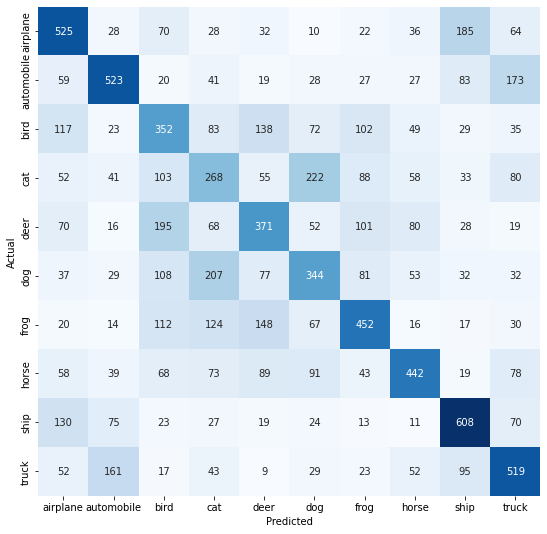

In [26]:
cm = confusion_matrix(y_test, grid_predictions)

labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(9,9))
sns.heatmap(cm, cbar=False, xticklabels=labels, yticklabels=labels, fmt='d', annot=True, cmap=plt.cm.Blues)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Classification Report

In [30]:
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.45      0.54      0.49      1000
           1       0.51      0.48      0.49      1000
           2       0.32      0.39      0.35      1000
           3       0.30      0.31      0.30      1000
           4       0.35      0.37      0.36      1000
           5       0.35      0.28      0.31      1000
           6       0.45      0.44      0.45      1000
           7       0.47      0.40      0.43      1000
           8       0.54      0.57      0.55      1000
           9       0.50      0.42      0.46      1000

    accuracy                           0.42     10000
   macro avg       0.42      0.42      0.42     10000
weighted avg       0.42      0.42      0.42     10000

